# Analysis of behavior in the Tacit Communication Game

This notebook demonstrates the analysis of communicative behavior produced during experimentally controlled interactions, i.e. the Tacit Communication Game.

To get started, clone the course github containing our experimental files

In [ ]:
!git clone https://github.com/StolkArjen/human-interaction.git
# just FYI, to remove the folder, use: !rm -rf human-interaction
# to clear all outputs, go to Edit > Clear all outputs, followed by Runtime > Restart

Our data are located in human-interaction/data/TCG_KU. But what files are in this directory? Let's get an inventory

## Import standard packages & local modules

In [1]:
# Standard packages
import os, sys
from glob import glob
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import pearsonr
from pprint import pprint

# Local modules
from read_json_tcg import read_json_tcg

## Load data

In [2]:
# Run this cell to make sure you're in the "human-interaction" course directory
os.path.dirname(os.getcwd())

'/Users/sush/Documents/grad_school/courses/human-interaction'

In [19]:
base_dir = os.path.dirname(os.getcwd())
data_dir = os.path.join(base_dir, 'data', 'TCG_KU')
files = glob(os.path.join(data_dir, '*'))

pprint(files) # show

['/Users/sush/Documents/grad_school/courses/human-interaction/data/TCG_KU/room000726',
 '/Users/sush/Documents/grad_school/courses/human-interaction/data/TCG_KU/room000719',
 '/Users/sush/Documents/grad_school/courses/human-interaction/data/TCG_KU/room000787',
 '/Users/sush/Documents/grad_school/courses/human-interaction/data/TCG_KU/room000729',
 '/Users/sush/Documents/grad_school/courses/human-interaction/data/TCG_KU/room000898',
 '/Users/sush/Documents/grad_school/courses/human-interaction/data/TCG_KU/room001147',
 '/Users/sush/Documents/grad_school/courses/human-interaction/data/TCG_KU/room001123',
 '/Users/sush/Documents/grad_school/courses/human-interaction/data/TCG_KU/room000665',
 '/Users/sush/Documents/grad_school/courses/human-interaction/data/TCG_KU/room000691',
 '/Users/sush/Documents/grad_school/courses/human-interaction/data/TCG_KU/room001141',
 '/Users/sush/Documents/grad_school/courses/human-interaction/data/TCG_KU/room000890',
 '/Users/sush/Documents/grad_school/courses

#### Just a note re: `print()` vs `pprint()`
In Python, `print()` is a built-in function that is used to output data to the standard output device, which is usually the screen. This function is often used for debugging purposes, to display messages, or to output the results of a program.

`pprint()` on the other hand, which stands for "pretty-print" is a function in Python's `pprint()` module (which we imported above) that outputs the same data as `print()` does but as a formatted representation, making it easier to read, like the list of files above.

In [22]:
# See what the difference is by uncommenting the line below! 
#print(files)

## Analysis of a single pair
### 1) Read data from a pair into the workspace

In [69]:
data_filepath = os.path.join(data_dir, 'room000635')
data = read_json_tcg(data_filepath)
pprint(data.label)

['TrialNr',
 'TrialType',
 'TrialTypeNr',
 'TrialOnset',
 'SenderPlayer',
 'SenderPlanTime',
 'SenderMovTime',
 'SenderNumMoves',
 'TargetNum',
 'TargetTime',
 'NonTargetTime',
 'ReceiverPlayer',
 'ReceiverPlanTime',
 'ReceiverMovTime',
 'ReceiverNumMoves',
 'Success',
 'SenderLocSuccess',
 'SenderOriSuccess',
 'ReceiverLocSuccess',
 'ReceiverOriSuccess',
 'Level',
 'TrialOffset']


In [70]:
# Create a pandas DataFrame
df = pd.DataFrame(data.trial[2], columns=data.label)

In [71]:
df.head()

,TrialNr,TrialType,TrialTypeNr,TrialOnset,SenderPlayer,SenderPlanTime,SenderMovTime,SenderNumMoves,TargetNum,TargetTime,...,ReceiverPlanTime,ReceiverMovTime,ReceiverNumMoves,Success,SenderLocSuccess,SenderOriSuccess,ReceiverLocSuccess,ReceiverOriSuccess,Level,TrialOffset
0,1,3,NaN,1601489459442,1,8579,7536,10,0,NaN,...,950,1284,2,True,1,1,1,1,2,1601489483266
1,2,3,NaN,1601489484705,2,5168,2714,3,0,NaN,...,522,2069,3,False,1,1,1,0,2,1601489500543
2,3,3,NaN,1601489501886,1,5856,3234,4,0,NaN,...,1310,795,2,True,1,1,1,1,2,1601489518361
3,4,3,NaN,1601489519688,2,4460,746,0,0,NaN,...,1089,2233,2,True,1,1,1,1,2,1601489533704
4,5,3,NaN,1601489535573,1,5839,3221,3,0,NaN,...,1920,3647,5,True,1,1,1,1,2,1601489556115


### 2) Plot communicative success

Text(0, 0.5, 'Success [%]')

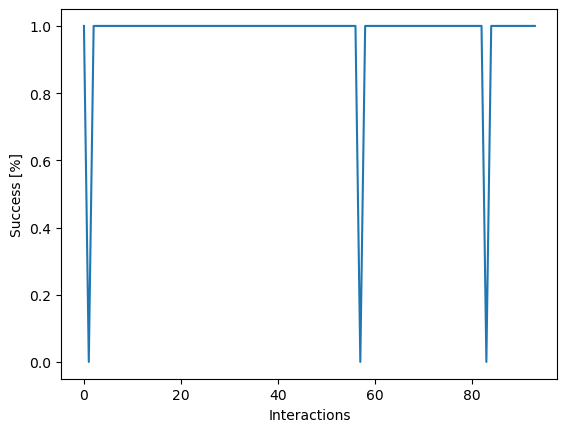

In [72]:
# Access the 'Success' column
success = df['Success']
plt.figure()
plt.plot(success)
plt.xlabel('Interactions')
plt.ylabel('Success [%]')

Text(0, 0.5, 'Level')

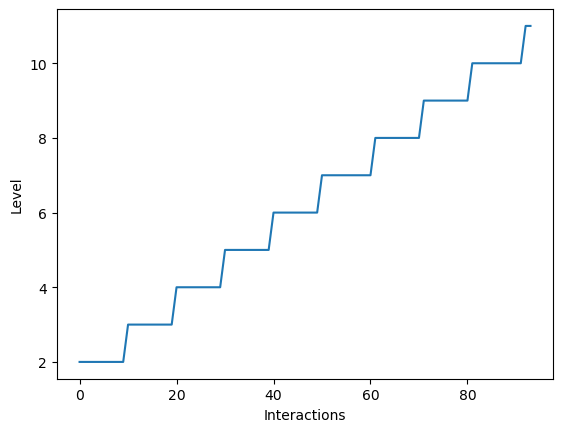

In [73]:
# Access the 'Level' column
level = df['Level']
plt.figure()
plt.plot(level)
plt.xlabel('Interactions')
plt.ylabel('Level')

### 3) Plot success separately for Known and Novel interactions

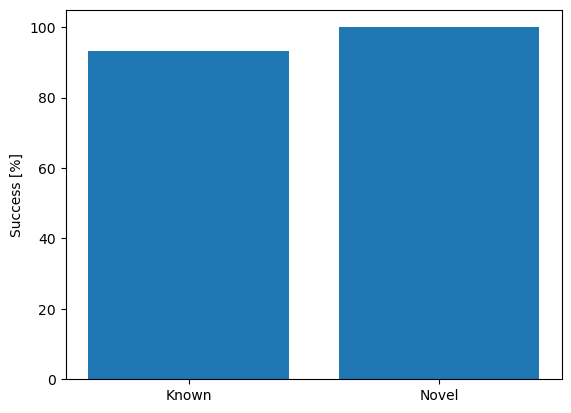

In [74]:
# Blocks of 4 (known)
known_idx = [0,1,2,3,9,10,11,12,18,19,20,21,27,28,29,30,36,37,38,39,45,46,47,48,54,55,56,57,63,64,65,66,72,73,74,75,81,82,83,84,90,91,92,93]                  

# Blocks of 5 (novel)
novel_idx = [4,5,6,7,8,13,14,15,16,17,22,23,24,25,26,31,32,33,34,35,40,41,42,43,44,49,50,51,52,53,58,59,60,61,62,67,68,69,70,71,76,77,78,79,80,85,86,87,88,89]

# Calculate percentage success for known and novel
known_suc = df.loc[known_idx, 'Success'].mean() * 100  # Convert to percentage
novel_suc = df.loc[novel_idx, 'Success'].mean() * 100  # Convert to percentage

plt.figure()
plt.bar(['Known', 'Novel'], [known_suc, novel_suc])
plt.ylabel('Success [%]')
plt.show()

Known trials contained communicative problems where pairs had previously coordinated and found shared solutions for. Novel trials contained communicative problems the pairs had not faced before, and for which they had to establish shared solutions still. What does the above plot tell you?

### 4) Plot time spent on target and non-target locations by the Sender 

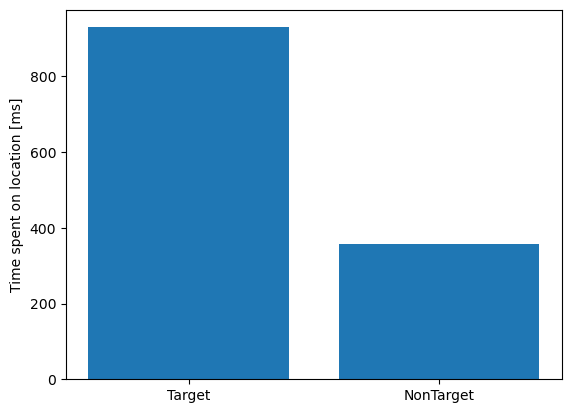

In [75]:
# Access the 'TargetTime' and 'NonTargetTime' columns
target = df['TargetTime']
nontarget = df['NonTargetTime']

# Calculate the mean for both target and non-target
# Note: It's important to handle NaN values appropriately here
target_mean = target.mean()
nontarget_mean = nontarget.mean()

# Plotting
plt.figure()
plt.bar(['Target', 'NonTarget'], [target_mean, nontarget_mean])
plt.ylabel('Time spent on location [ms]')
plt.show()

Target locations are locations where the Receiver's shape needs to be positioned by the Receiver. Non-target locations are other locations visited by the Sender during his/her turn. What does this plot tell you?

### Plot Sender and Receiver planning times

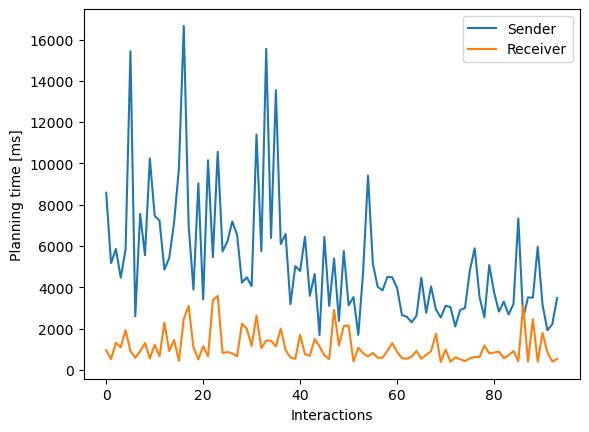

In [76]:
sender_pt = df['SenderPlanTime']
receiver_pt = df['ReceiverPlanTime']

# Plotting
plt.figure()
plt.plot(sender_pt, label='Sender')
plt.plot(receiver_pt, label='Receiver')
plt.xlabel('Interactions')
plt.ylabel('Planning time [ms]')
plt.legend()
plt.show()

### What do you notice? 

#### Calculate and plot the correlation in planning times, separately for the Sender and Receiver roles

#### Sender planning times

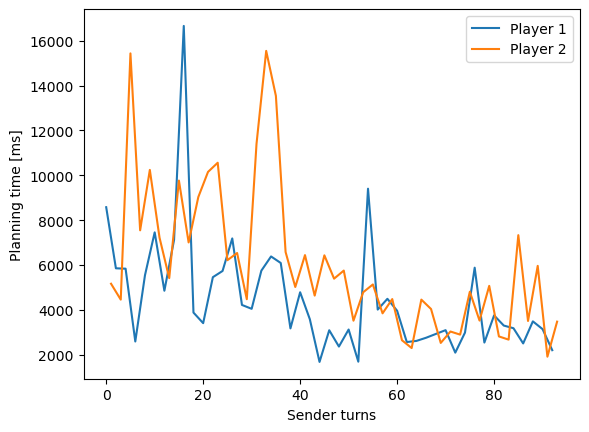

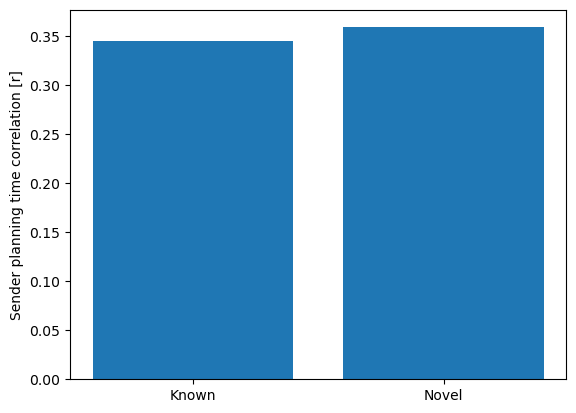

In [78]:
# Filter data for Player 1 and Player 2 as sender
p1_df = df[df['SenderPlayer'] == 1]
p2_df = df[df['SenderPlayer'] == 2]

# Get planning times for Player 1 and Player 2
p1sender_pt = p1_df['SenderPlanTime']
p2sender_pt = p2_df['SenderPlanTime']

# Plot planning times
plt.figure()
plt.plot(p1sender_pt, label='Player 1')
plt.plot(p2sender_pt, label='Player 2')
plt.xlabel('Sender turns')
plt.ylabel('Planning time [ms]')
plt.legend()
plt.show()

# Filter known and novel interactions for Player 1 and Player 2
p1sender_known = p1_df[p1_df.index.isin(known_idx)]
p1sender_novel = p1_df[p1_df.index.isin(novel_idx)]
p2sender_known = p2_df[p2_df.index.isin(known_idx)]
p2sender_novel = p2_df[p2_df.index.isin(novel_idx)]

# Calculate Pearson correlation for sender planning times
rk_sender, _ = pearsonr(p1sender_known['SenderPlanTime'], p2sender_known['SenderPlanTime'])
rn_sender, _ = pearsonr(p1sender_novel['SenderPlanTime'], p2sender_novel['SenderPlanTime'])

# Plot correlations
plt.figure()
plt.bar(['Known', 'Novel'], [rk_sender, rn_sender])
plt.ylabel('Sender planning time correlation [r]')
plt.show()

#### Receiver planning times

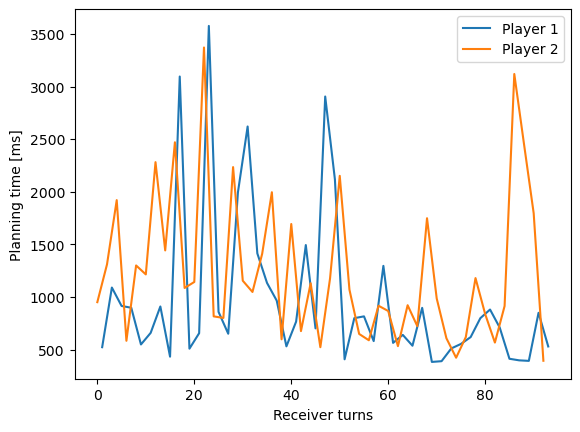

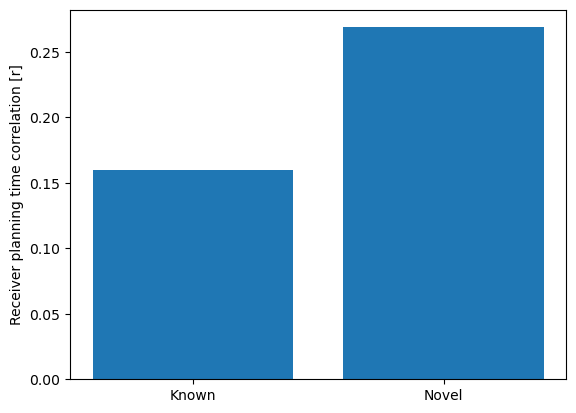

In [80]:
# Filter data for Player 1 and Player 2 as receiver
p1_df_receiver = df[df['ReceiverPlayer'] == 1]
p2_df_receiver = df[df['ReceiverPlayer'] == 2]

# Get planning times for Player 1 and Player 2 as receiver
p1receiver_pt = p1_df_receiver['ReceiverPlanTime']
p2receiver_pt = p2_df_receiver['ReceiverPlanTime']

# Plot planning times
plt.figure()
plt.plot(p1receiver_pt, label='Player 1')
plt.plot(p2receiver_pt, label='Player 2')
plt.xlabel('Receiver turns')
plt.ylabel('Planning time [ms]')
plt.legend()
plt.show()

# Filter known and novel interactions for Player 1 and Player 2 as receiver
p1receiver_known = p1_df_receiver[p1_df_receiver.index.isin(known_idx)]
p1receiver_novel = p1_df_receiver[p1_df_receiver.index.isin(novel_idx)]
p2receiver_known = p2_df_receiver[p2_df_receiver.index.isin(known_idx)]
p2receiver_novel = p2_df_receiver[p2_df_receiver.index.isin(novel_idx)]

# Calculate Pearson correlation for receiver planning times
rk_receiver, _ = pearsonr(p1receiver_known['ReceiverPlanTime'], p2receiver_known['ReceiverPlanTime'])
rn_receiver, _ = pearsonr(p1receiver_novel['ReceiverPlanTime'], p2receiver_novel['ReceiverPlanTime'])

# Plot correlations
plt.figure()
plt.bar(['Known', 'Novel'], [rk_receiver, rn_receiver])
plt.ylabel('Receiver planning time correlation [r]')
plt.show()

Correlation analysis helps to capture shared variance in the planning time timeseries. What do these correlations tell you about the communicative difficulty of the problems? Are they difficult for both players or for just one individual at a time?

## Group analysis of multiple pairs
### 1) Read data from all pairs into the workspace

In [81]:
files = glob(os.path.join(data_dir, '*'))

group_data = []
for l in files:
    group_data.append(read_json_tcg(l)) # store in list

In [82]:
dataframes = []
for f in files:
    # Extract data_id from the file name
    data_id = f.split('/')[-1]
    
    # Read the data
    data_object = read_json_tcg(f)
    trial_data = data_object.trial[2]
    
    # Create a DataFrame from trial_data
    df = pd.DataFrame(trial_data, columns=data.label)

    # Add the data_id column
    df['data_id'] = data_id

    # Append to the list of DataFrames
    dataframes.append(df)

# Concatenate all DataFrames into one
group_df = pd.concat(dataframes, ignore_index=True)

In [83]:
group_df.head()

,TrialNr,TrialType,TrialTypeNr,TrialOnset,SenderPlayer,SenderPlanTime,SenderMovTime,SenderNumMoves,TargetNum,TargetTime,...,ReceiverMovTime,ReceiverNumMoves,Success,SenderLocSuccess,SenderOriSuccess,ReceiverLocSuccess,ReceiverOriSuccess,Level,TrialOffset,data_id
0,1,3,NaN,1601570672280,1,7957,4179,5,0,NaN,...,1421,2,True,1,1,1,1,2,1601570692642,room000726
1,2,3,NaN,1601570694010,2,1882,3272,3,0,NaN,...,3197,2,True,1,1,1,1,2,1601570709325,room000726
2,3,3,NaN,1601570710734,1,2475,2426,4,0,NaN,...,1197,2,True,1,1,1,1,2,1601570723171,room000726
3,4,3,NaN,1601570724517,2,4796,4782,4,1,489.0,...,1317,2,True,1,1,1,1,2,1601570741986,room000726
4,5,3,NaN,1601570743387,1,6091,675,1,0,NaN,...,4890,5,True,1,1,1,1,2,1601570761549,room000726


In [84]:
group_df.shape

(5640, 23)

In [86]:
group_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5640 entries, 0 to 5639
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   TrialNr             5640 non-null   int64  
 1   TrialType           5640 non-null   int64  
 2   TrialTypeNr         0 non-null      float64
 3   TrialOnset          5640 non-null   int64  
 4   SenderPlayer        5640 non-null   int64  
 5   SenderPlanTime      5640 non-null   int64  
 6   SenderMovTime       5640 non-null   int64  
 7   SenderNumMoves      5640 non-null   int64  
 8   TargetNum           5640 non-null   int64  
 9   TargetTime          2961 non-null   float64
 10  NonTargetTime       5271 non-null   float64
 11  ReceiverPlayer      5640 non-null   int64  
 12  ReceiverPlanTime    5640 non-null   int64  
 13  ReceiverMovTime     5640 non-null   int64  
 14  ReceiverNumMoves    5640 non-null   int64  
 15  Success             5640 non-null   bool   
 16  Sender

### 2) Plot communicative success

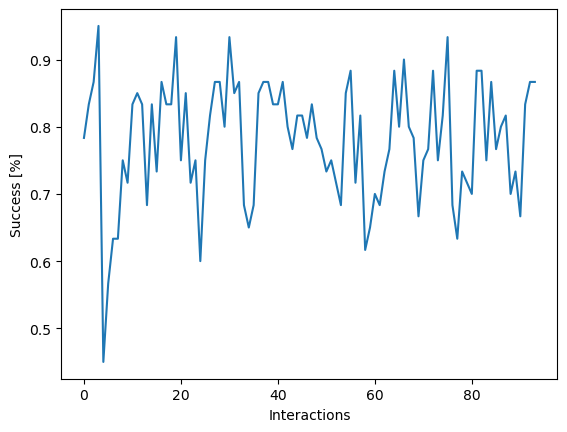

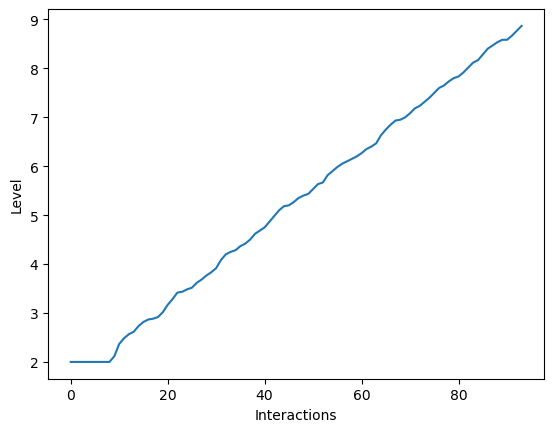

In [64]:
suc = []
lev = []
for f in files:
    # Extract data_id from the file name
    data_id = f.split('/')[-1]

    # Read the data
    data_object = read_json_tcg(f)
    trial_data = data_object.trial[2]
    
    # Create DataFrames for 'Success' and 'Level'
    idx_success = data_object.label.index('Success')
    idx_level = data_object.label.index('Level')

    df_success = pd.DataFrame([i[idx_success] for i in trial_data], columns=[data_id])
    df_level = pd.DataFrame([i[idx_level] for i in trial_data], columns=[data_id])

    suc.append(df_success)
    lev.append(df_level)

# Concatenate all 'Success' and 'Level' DataFrames side by side
suc_all = pd.concat(suc, axis=1)
lev_all = pd.concat(lev, axis=1)

# Plot average 'Success'
plt.figure()
plt.plot(suc_all.mean(axis=1))
plt.xlabel('Interactions')
plt.ylabel('Success [%]')

# Plot average 'Level'
plt.figure()
plt.plot(lev_all.mean(axis=1))
plt.xlabel('Interactions')
plt.ylabel('Level')
plt.show()

### 3) Plot success separately for Known and Novel interactions

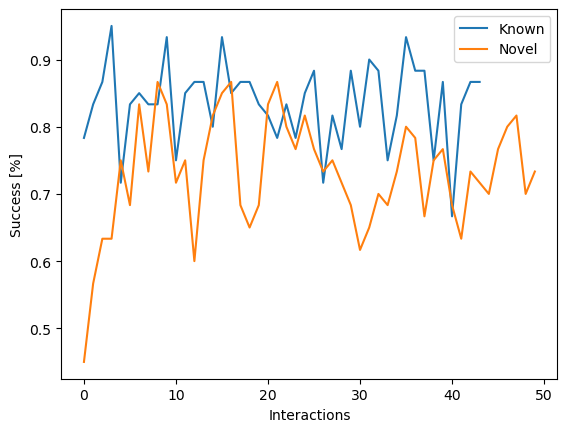

In [66]:
suc_all_mean = suc_all.sum(axis=1) / suc_all.shape[1]
suc_all_mean_known = [suc_all_mean[k] for k in known_idx]
suc_all_mean_novel = [suc_all_mean[n] for n in novel_idx]

plt.figure()
plt.plot(suc_all_mean_known)
plt.plot(suc_all_mean_novel)
plt.xlabel('Interactions')
plt.ylabel('Success [%]')
plt.legend(['Known','Novel'])

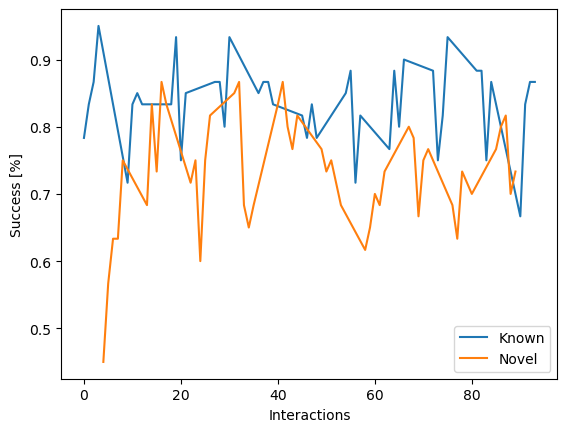

In [67]:
# Calculate mean success across all files
suc_all_mean = suc_all.mean(axis=1)

# Filter mean success for known and novel interactions
suc_all_mean_known = suc_all_mean.loc[known_idx]
suc_all_mean_novel = suc_all_mean.loc[novel_idx]

# Plotting
plt.figure()
plt.plot(suc_all_mean_known, label='Known')
plt.plot(suc_all_mean_novel, label='Novel')
plt.xlabel('Interactions')
plt.ylabel('Success [%]')
plt.legend()
plt.show()

#### Calculate and plot the correlation in planning times, separately for the Sender and Receiver roles

Text(0, 0.5, 'Receiver planning time correlation [r]')

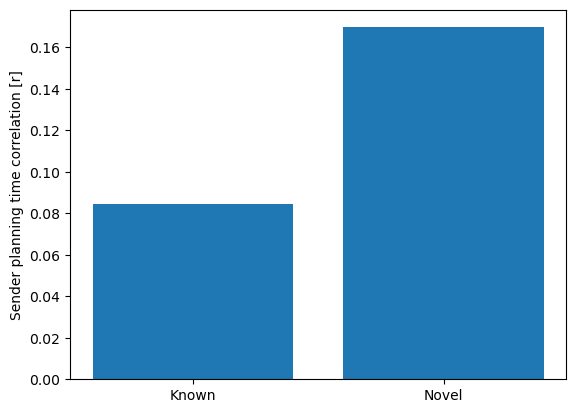

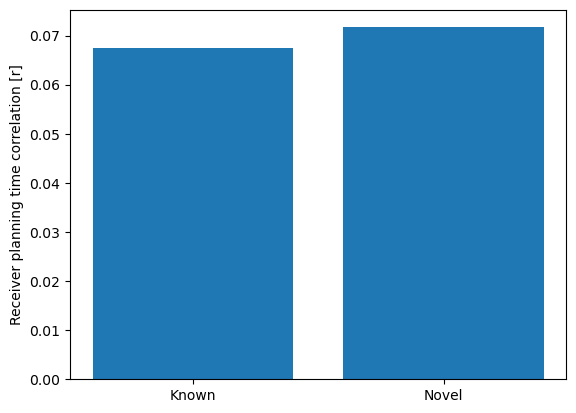

In [90]:
rk_sender = []
rn_sender = []
rk_receiver = []
rn_receiver = []
for d in group_data:
  # planning times
    idx = d.label.index('SenderPlanTime')
    senderPT = [i[idx] for i in d.trial[2]]
    idx = d.label.index('ReceiverPlanTime')
    receiverPT = [i[idx] for i in d.trial[2]]
    
    # indices
    idx = d.label.index('SenderPlayer')
    # known trials where p1 is sender
    p1sender_known = [x for x, i in enumerate(d.trial[2]) if i[idx] == 1 and x in known_idx]
    # novel trials where p1 is sender
    p1sender_novel = [x for x, i in enumerate(d.trial[2]) if i[idx] == 1 and x in novel_idx] 
    # known trials where p2 is sender
    p2sender_known = [x for x, i in enumerate(d.trial[2]) if i[idx] == 2 and x in known_idx]
    # novel trials where p2 is sender
    p2sender_novel = [x for x, i in enumerate(d.trial[2]) if i[idx] == 2 and x in novel_idx] 
    
    idx = d.label.index('ReceiverPlayer')
    # known trials where p1 is receiver
    p1receiver_known = [x for x, i in enumerate(d.trial[2]) if i[idx] == 1 and x in known_idx]
    # novel trials where p1 is receiver
    p1receiver_novel = [x for x, i in enumerate(d.trial[2]) if i[idx] == 1 and x in novel_idx]
    # known trials where p2 is receiver
    p2receiver_known = [x for x, i in enumerate(d.trial[2]) if i[idx] == 2 and x in known_idx] 
    # novel trials where p2 is receiver
    p2receiver_novel = [x for x, i in enumerate(d.trial[2]) if i[idx] == 2 and x in novel_idx] 
    
    # correlations
    r, _ = pearsonr([senderPT[p] for p in p1sender_known], [senderPT[p] for p in p2sender_known])
    rk_sender.append(r)
    r, _ = pearsonr([senderPT[p] for p in p1sender_novel], [senderPT[p] for p in p2sender_novel])
    rn_sender.append(r)
    r, _ = pearsonr([receiverPT[p] for p in p1receiver_known], [receiverPT[p] for p in p2receiver_known])
    rk_receiver.append(r)
    r, _ = pearsonr([receiverPT[p] for p in p1receiver_novel], [receiverPT[p] for p in p2receiver_novel])
    rn_receiver.append(r)

plt.figure()
plt.bar(['Known', 'Novel'], [np.mean(rk_sender), np.mean(rn_sender)])
plt.ylabel('Sender planning time correlation [r]')
plt.figure()
plt.bar(['Known', 'Novel'], [np.mean(rk_receiver), np.mean(rn_receiver)])
plt.ylabel('Receiver planning time correlation [r]')

## Brain predictions

1) Pairs were more successful when they could rely on previously established shared context (Known > Novel interactions). 

What types of processes are **unique** to sender and receivers, respectively? And what processes might be **overlapping** across communicative production and comprehension?

How would you investigate this if you could measure people's brain activity in the game?

2) **When** would you expect to observe these overlapping (neural) processes? After, during, or before the production and comprehension of communicative behavior? 

How would you investigate this?

3) Pairs' planning times were more strongly correlated over Novel than over Known interactions, consistent with a **negotiation** of contextual knowledge over the course of Novel interactions. 

Would you expect this negotiation process to be visible in the brain data, and how would you test this neural prediction?